In [1]:
a = 5
a

5

In [2]:
# This is to create ellipse shapes
import numpy as np
import matplotlib.pyplot as plt
import cv2
# import os
from math import pi, cos, sin


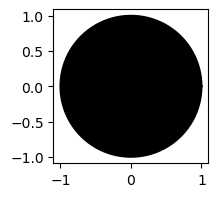

In [3]:
u=0.       #x-position of the center
v=0.     #y-position of the center
a=1.0       #radius on the x-axis 
b=1.0      #radius on the y-axis


t = np.linspace(0, 2*pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])  #u,v removed to keep the same center location
plt.figure(figsize=(2, 2))
plt.plot(u+Ell[0,:], v+Ell[1,:] , color ='black' )     #initial ellipse
plt.fill(u+Ell[0,:], v+Ell[1,:],"black")
plt.axis('on')  # To remove frame box
plt.xlim(-1.2,1.2)
plt.ylim(-1.2,1.2)
plt.axis('equal')
plt.show()

In [14]:
def save_png_filled(coord,save_filename):
    plt.clf()
    plt.figure(figsize=(2., 2.))
    plt.tick_params(left=False, right=False, labelleft=False, labelbottom=False, bottom=False)
    x = coord[0,:]
    y = coord[1,:]

    plt.plot(x, y, "black")
    plt.fill(x, y,"black")
    plt.axis('off')  # To remove frame box
    plt.axis('equal')
    plt.xlim(-1.2,1.2)
    plt.ylim(-1.2,1.2)
    plt.savefig('/scratch/abraham/Documents/mega_git/mega/data/train/raw/shape/shape_oblate/'+save_filename+'.png') # bbox_inches="tight"
    print('Saved /scratch/abraham/Documents/mega_git/mega/data/train/raw/shape/shape_oblate/'+save_filename+'.png')
    plt.show()
    plt.close()
    # Convert RGB to grayscale
    image2cnvt = cv2.imread('/scratch/abraham/Documents/mega_git/mega/data/train/raw/shape/shape_oblate/'+save_filename+'.png')
    gray_cnvtd = cv2.cvtColor(image2cnvt, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('/scratch/abraham/Documents/mega_git/mega/data/train/raw/shape/shape_oblate/'+save_filename+'.png', gray_cnvtd)
    

Saved /scratch/abraham/Documents/mega_git/mega/data/train/raw/shape/shape_oblate/circle1.png


<Figure size 640x480 with 0 Axes>

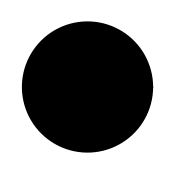

In [15]:
save_png_filled(coord=Ell,save_filename='circle1')

In [ ]:
# For rotated ellipse

t_rot=pi/4 #rotation angle

R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  #2-D rotation matrix
Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],color='black' )    #rotated ellipse
plt.fill(u+Ell_rot[0,:], v+Ell_rot[1,:],"black")
plt.axis('off')  # To remove frame box
plt.show()


In [2]:
# To Test what is the max value of the shape array

import numpy as np
import matplotlib.pyplot as plt


In [16]:
# train_shape_dir = '/home/abraham/Documents/ms_proj_shape_lc_gen/data_npy/shape_npy/shape_filled5.npy'
train_shape_dir = '/scratch/abraham/Documents/mega_git/mega/data/train/npy/shape/shape_oblate.npy'


train_shape = np.load(train_shape_dir)


In [19]:
print('min = ',np.amin(train_shape))
print('max = ',np.amax(train_shape))

min =  0
max =  255


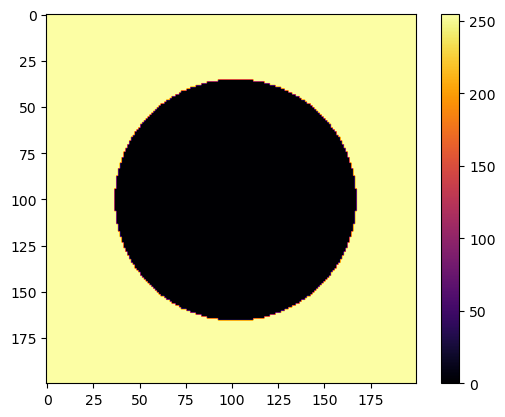

In [18]:
img = plt.imshow(train_shape[0],cmap='inferno')
plt.colorbar(img)
plt.show()

In [8]:
train_lc_dir = '/home/abraham/Documents/ms_proj_shape_lc_gen/data_npy/lc_npy/lc_dict_5.npy'
train_lc = np.load(train_lc_dir)

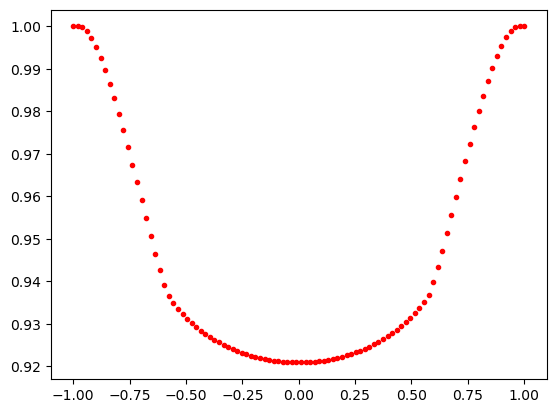

In [9]:
ph = np.linspace(-1,1,len(train_lc[0]))

plt.scatter(ph, train_lc[0],color = 'red',marker='.')
plt.show()